In [201]:
import numpy as np
import pandas as pd
from sklearn import svm
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [202]:
df = pd.read_csv('C:/Users/USER/OneDrive - Ariel University/Desktop/data_mining_2025/file.csv', encoding='windows-1255')
df

,ISSUANCEDATE,BONDS,SERIES,ACTUALTERMTOMATURITY,ORIGINALTERMTOMATURITY,REDEMTIONDATE,COUPON,OFFEREDQUANTITY,PURCHASEDQUANTITY,ADDITIONALPURCHASED,AVERAGEPRICE,CUTOFFPRICE,TOTALFUNDING,DEMANDEDAMOUNT,COVERRATIO,GROSSAVGYIELD,GROSSCUTOFFYIELD
0,11/19/2024 12:00:00 AM,ממשלתית,1184076,28.0,31,29/11/2052,2.80,116.2,116.2,0.0,67.86,67.86,78.87,116.2,1.0,5.19,5.19
1,11/19/2024 12:00:00 AM,ממשלתית,1202332,10.4,11,30/03/2035,4.00,150.0,150.0,0.0,96.50,96.50,144.75,150.0,1.0,4.75,4.75
2,11/19/2024 12:00:00 AM,ממשלתית,1203579,2.9,4,30/09/2027,3.75,131.2,14.6,-116.6,98.54,98.54,14.40,14.6,0.1,4.50,4.50
3,11/19/2024 12:00:00 AM,ממשלתית,1212893,4.8,5,31/08/2029,4.60,163.5,159.2,-4.3,100.21,100.21,159.54,159.2,1.0,4.60,4.60
4,11/19/2024 12:00:00 AM,ממשלתית צמודה,1197326,3.9,5,31/10/2028,1.10,136.5,136.5,0.0,101.06,101.06,137.95,136.5,1.0,2.04,2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,01/07/2020 00:00,ממשלתית בריבית משתנה,1141795,6.4,9,31/05/2026,0.13,56.6,46.4,-10.2,99.40,99.40,46.11,46.4,0.8,0.23,0.23
1924,01/06/2020 00:00,ממשלתית,1155068,3.9,5,30/11/2023,1.50,250.0,250.0,0.0,104.70,104.68,261.75,938.0,3.8,0.33,0.33
1925,01/06/2020 00:00,ממשלתית,1158104,2.6,3,31/07/2022,0.75,250.0,250.0,0.0,101.72,101.71,254.30,1345.0,5.4,0.21,0.21
1926,01/06/2020 00:00,ממשלתית צמודה,1157023,9.4,10,31/05/2029,0.50,250.0,250.0,0.0,112.13,112.11,280.33,1312.0,5.2,-0.07,-0.07


In [203]:
grouped_df = df.groupby('OFFEREDQUANTITY')['TOTALFUNDING'].mean().reset_index()

# הדפסת התוצאה
print(grouped_df)

     OFFEREDQUANTITY  TOTALFUNDING
0          12.5          13.21000 
1          13.5           9.00000 
2          14.0          13.36000 
3          15.0          22.86000 
4          17.2          14.09000 
..               ...           ...
508      1200.0        1160.72000 
509      1244.9        1131.33000 
510      1250.0        1209.89375 
511      1500.0        1449.82500 
512      1978.8        1598.68000 

[513 rows x 2 columns]


### כאן בדקנו אם העמודה היא פשוט חיסור של שני עמודות אחרות וגילינו ע"י החיסור ביניהן שזה לא הדבר הנכון במדויק (בכל המקרים)

In [205]:
true_count = (df['PURCHASEDQUANTITY'] - df['OFFEREDQUANTITY'] == df['ADDITIONALPURCHASED']).sum()

print(f"Number of True values: {true_count}")

Number of True values: 1691


In [206]:
true_count = (df['DEMANDEDAMOUNT'] / df['PURCHASEDQUANTITY'] == df['COVERRATIO']).sum()

print(f"Number of True values: {true_count}")

Number of True values: 324


In [207]:
from autoviz import AutoViz_Class
%matplotlib inline

In [208]:
AV = AutoViz_Class()

In [209]:
# filename = df
# target_variable = "Horsepower"

# dft = AV.AutoViz(
#     filename='', 
#     sep=',', 
#     depVar='', 
#     dfte=filename, 
#     header=0, 
#     verbose=0, 
#     lowess=False, 
#     chart_format='svg', 
#     max_rows_analyzed=10000, 
#     max_cols_analyzed=30
# )

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ISSUANCEDATE            1928 non-null   object 
 1   BONDS                   1928 non-null   object 
 2   SERIES                  1928 non-null   int64  
 3   ACTUALTERMTOMATURITY    1928 non-null   float64
 4   ORIGINALTERMTOMATURITY  1928 non-null   int64  
 5   REDEMTIONDATE           1928 non-null   object 
 6   COUPON                  1928 non-null   float64
 7   OFFEREDQUANTITY         1928 non-null   float64
 8   PURCHASEDQUANTITY       1928 non-null   float64
 9   ADDITIONALPURCHASED     1928 non-null   float64
 10  AVERAGEPRICE            1928 non-null   float64
 11  CUTOFFPRICE             1928 non-null   float64
 12  TOTALFUNDING            1928 non-null   float64
 13  DEMANDEDAMOUNT          1928 non-null   float64
 14  COVERRATIO              1928 non-null   

In [211]:
df.describe()

,SERIES,ACTUALTERMTOMATURITY,ORIGINALTERMTOMATURITY,COUPON,OFFEREDQUANTITY,PURCHASEDQUANTITY,ADDITIONALPURCHASED,AVERAGEPRICE,CUTOFFPRICE,TOTALFUNDING,DEMANDEDAMOUNT,COVERRATIO,GROSSAVGYIELD,GROSSCUTOFFYIELD
count,1.928000e+03,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000
mean,1.173917e+06,9.549118,10.950207,1.291712,295.739938,281.591753,-14.149429,98.595633,98.552801,276.454487,1149.776452,3.165145,1.993994,1.999160
std,1.745149e+04,8.418066,8.888084,1.422572,214.454188,223.613233,37.199798,10.911939,10.913371,220.346036,1151.368037,2.201867,1.798269,1.800022
min,1.125400e+06,0.500000,1.000000,0.000000,12.500000,0.100000,-423.700000,62.220000,62.030000,0.100000,0.100000,0.000000,-0.220000,-0.220000
25%,1.166180e+06,3.900000,5.000000,0.100000,143.225000,104.300000,-2.500000,96.180000,96.150000,100.357500,104.300000,1.000000,0.300000,0.307500
50%,1.172220e+06,7.700000,10.000000,0.500000,250.000000,250.000000,0.000000,99.580000,99.545000,242.165000,1051.000000,3.400000,1.450000,1.455000
75%,1.184076e+06,10.400000,11.000000,1.750000,450.000000,450.000000,0.000000,101.577500,101.520000,434.852500,1762.250000,4.800000,3.902500,3.920000
max,1.212893e+06,31.200000,31.000000,5.500000,1978.800000,1651.900000,0.000000,152.390000,152.390000,1598.680000,7761.000000,10.000000,5.730000,5.740000


In [212]:
df['BONDS'].unique()

array(['ממשלתית', 'ממשלתית צמודה', 'ממשלתית קצרה', 'ממשלתית בריבית משתנה'],
      dtype=object)

In [213]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding using Scikit-learn
encoder = OneHotEncoder(sparse_output = False)  # sparse=False to return a dense array
encoded_array = encoder.fit_transform(df[['BONDS']])

df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['BONDS']))

df_encoded

,BONDS_ממשלתית,BONDS_ממשלתית בריבית משתנה,BONDS_ממשלתית צמודה,BONDS_ממשלתית קצרה
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1923,0.0,1.0,0.0,0.0
1924,1.0,0.0,0.0,0.0
1925,1.0,0.0,0.0,0.0
1926,0.0,0.0,1.0,0.0


In [214]:
df = df.drop(columns=['ISSUANCEDATE','REDEMTIONDATE'])

In [215]:
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns=['BONDS'])

# PCA

In [276]:
from sklearn.preprocessing import StandardScaler

features = df.select_dtypes(include=['float64', 'int64'])

# Standardizing the features
x = StandardScaler().fit_transform(features)

In [310]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(x)

PCA(n_components=0.95)

In [312]:
pca_trans = pca.transform(x)

In [314]:
pca.explained_variance_ratio_

array([0.23695118, 0.22156363, 0.12213083, 0.11273936, 0.09950311,
       0.07587157, 0.0662184 , 0.02853854])

In [324]:
pca = PCA(8)
pca_data = pca.fit_transform(x)

pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(8)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.894370,-3.644107,-1.038615,-0.656315,-1.426569,-1.536209,1.199255,0.242692
1,1.200984,-2.766333,-0.852702,0.473852,-0.227473,1.373600,-0.102696,-0.113187
2,0.791757,-2.841313,-1.015011,1.233016,0.056948,1.542297,-0.510890,-0.282941
3,1.506605,-2.690065,-1.080404,0.806838,-0.036252,2.068373,-0.613641,-0.209673
4,-1.396136,-0.124347,-1.900994,0.298808,-0.683827,1.115315,-0.993927,-0.077941
...,...,...,...,...,...,...,...,...
1923,-2.290763,-0.186344,-0.395543,-0.253673,3.430464,-1.589030,0.103356,0.372099
1924,-0.278702,0.122847,1.732374,0.750117,0.523114,0.069313,-0.135809,-0.052057
1925,0.026307,0.657166,1.810624,0.769750,0.315903,-0.463729,-0.602185,-0.384221
1926,-1.720692,1.934621,0.616718,-0.921055,-0.230650,0.563381,-0.408612,-0.581515


In [163]:
wcss = []
cl_num=19
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

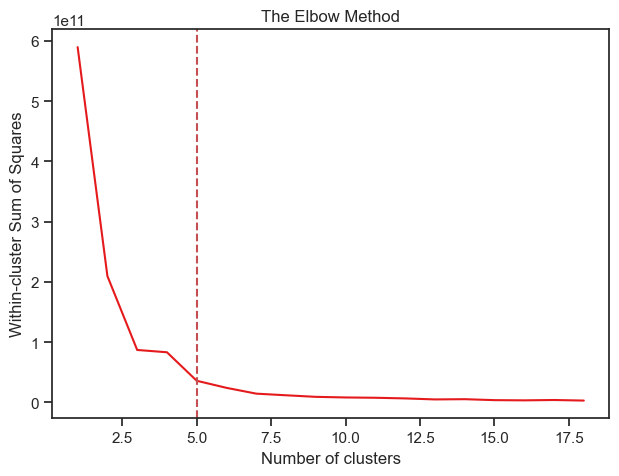

In [167]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
optimal_k = 5
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')

In [169]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df)
identified_clusters = kmeans.fit_predict(df)
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = identified_clusters

In [171]:
data_with_clusters

,SERIES,ACTUALTERMTOMATURITY,ORIGINALTERMTOMATURITY,COUPON,OFFEREDQUANTITY,PURCHASEDQUANTITY,ADDITIONALPURCHASED,AVERAGEPRICE,CUTOFFPRICE,TOTALFUNDING,DEMANDEDAMOUNT,COVERRATIO,GROSSAVGYIELD,GROSSCUTOFFYIELD,BONDS_ממשלתית,BONDS_ממשלתית בריבית משתנה,BONDS_ממשלתית צמודה,BONDS_ממשלתית קצרה,Cluster
0,1184076,28.0,31,2.80,116.2,116.2,0.0,67.86,67.86,78.87,116.2,1.0,5.19,5.19,1.0,0.0,0.0,0.0,0
1,1202332,10.4,11,4.00,150.0,150.0,0.0,96.50,96.50,144.75,150.0,1.0,4.75,4.75,1.0,0.0,0.0,0.0,2
2,1203579,2.9,4,3.75,131.2,14.6,-116.6,98.54,98.54,14.40,14.6,0.1,4.50,4.50,1.0,0.0,0.0,0.0,2
3,1212893,4.8,5,4.60,163.5,159.2,-4.3,100.21,100.21,159.54,159.2,1.0,4.60,4.60,1.0,0.0,0.0,0.0,2
4,1197326,3.9,5,1.10,136.5,136.5,0.0,101.06,101.06,137.95,136.5,1.0,2.04,2.04,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,1141795,6.4,9,0.13,56.6,46.4,-10.2,99.40,99.40,46.11,46.4,0.8,0.23,0.23,0.0,1.0,0.0,0.0,4
1924,1155068,3.9,5,1.50,250.0,250.0,0.0,104.70,104.68,261.75,938.0,3.8,0.33,0.33,1.0,0.0,0.0,0.0,1
1925,1158104,2.6,3,0.75,250.0,250.0,0.0,101.72,101.71,254.30,1345.0,5.4,0.21,0.21,1.0,0.0,0.0,0.0,1
1926,1157023,9.4,10,0.50,250.0,250.0,0.0,112.13,112.11,280.33,1312.0,5.2,-0.07,-0.07,0.0,0.0,1.0,0.0,1


In [175]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# פיצול הנתונים לפיצ'רים ותוויות אשכולות
X = data_with_clusters.drop('Cluster', axis=1)  # כל הפיצ'רים
y = data_with_clusters['Cluster']  # תוויות אשכולות

# יצירת מודל Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)

# חשיבות הפיצ'רים
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

             Feature            Importance
0                       SERIES   0.458047 
3                       COUPON   0.116601 
12               GROSSAVGYIELD   0.067796 
13            GROSSCUTOFFYIELD   0.063530 
7                 AVERAGEPRICE   0.055933 
2       ORIGINALTERMTOMATURITY   0.054195 
1         ACTUALTERMTOMATURITY   0.053176 
8                  CUTOFFPRICE   0.048804 
14               BONDS_ממשלתית   0.017274 
9                 TOTALFUNDING   0.014929 
5            PURCHASEDQUANTITY   0.011132 
15  BONDS_ממשלתית בריבית משתנה   0.011113 
16         BONDS_ממשלתית צמודה   0.009915 
4              OFFEREDQUANTITY   0.008614 
11                  COVERRATIO   0.002718 
10              DEMANDEDAMOUNT   0.002337 
6          ADDITIONALPURCHASED   0.002268 
17          BONDS_ממשלתית קצרה   0.001618 


In [327]:
!git --version

git version 2.42.0.windows.2


In [329]:
!git init

Initialized empty Git repository in C:/Users/USER/Project/.git/


In [333]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Data Mining 2025.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [335]:
!git remote add origin https://github.com/DorNatan/data-mining-project-2025.git

In [351]:
!git add .

In [345]:
!git config --global user.name "Dor Natan"
!git config --global user.email "dornatan17@gmail.com"

In [349]:
!git commit -m "Initial commit"

[main (root-commit) d22c79b] Initial commit
 2 files changed, 4475 insertions(+)
 create mode 100644 .ipynb_checkpoints/Data Mining 2025-checkpoint.ipynb
 create mode 100644 Data Mining 2025.ipynb


In [355]:
!git branch -M main
!git push -u origin main

To https://github.com/DorNatan/data-mining-project-2025.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/DorNatan/data-mining-project-2025.git'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [357]:
!git remote -v

origin	https://github.com/DorNatan/data-mining-project-2025.git (fetch)
origin	https://github.com/DorNatan/data-mining-project-2025.git (push)


# עבודה שוטפת עם המאגר בגיטהאב
### עדכון שינויים:

In [362]:
!Edit files
!git add .
!git commit -m "Description of changes"
!git push


'Edit' is not recognized as an internal or external command,
operable program or batch file.


[main d1ac907] Description of changes
 1 file changed, 121 insertions(+), 2 deletions(-)


fatal: The current branch main has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin main

To have this happen automatically for branches without a tracking
upstream, see 'push.autoSetupRemote' in 'git help config'.



In [368]:
!git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Data Mining 2025.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [372]:
!git add "Data Mining 2025.ipynb"

In [374]:
!git commit -m "Updated notebook"
!git push

[main f5e7ce7] Updated notebook
 1 file changed, 60 insertions(+), 3 deletions(-)


fatal: The current branch main has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin main

To have this happen automatically for branches without a tracking
upstream, see 'push.autoSetupRemote' in 'git help config'.



In [382]:
!git pull origin main --allow-unrelated-histories

Merge made by the 'ort' strategy.
 .gitignore | 171 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 README.md  |  21 ++++++++
 2 files changed, 192 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 README.md


From https://github.com/DorNatan/data-mining-project-2025
 * branch            main       -> FETCH_HEAD


In [ ]:
git add .